In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [24]:
data.shape

(158, 12)

In [25]:
#check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [26]:
#check the nullvalues

data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [27]:
correlation = data.corr()
correlation

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


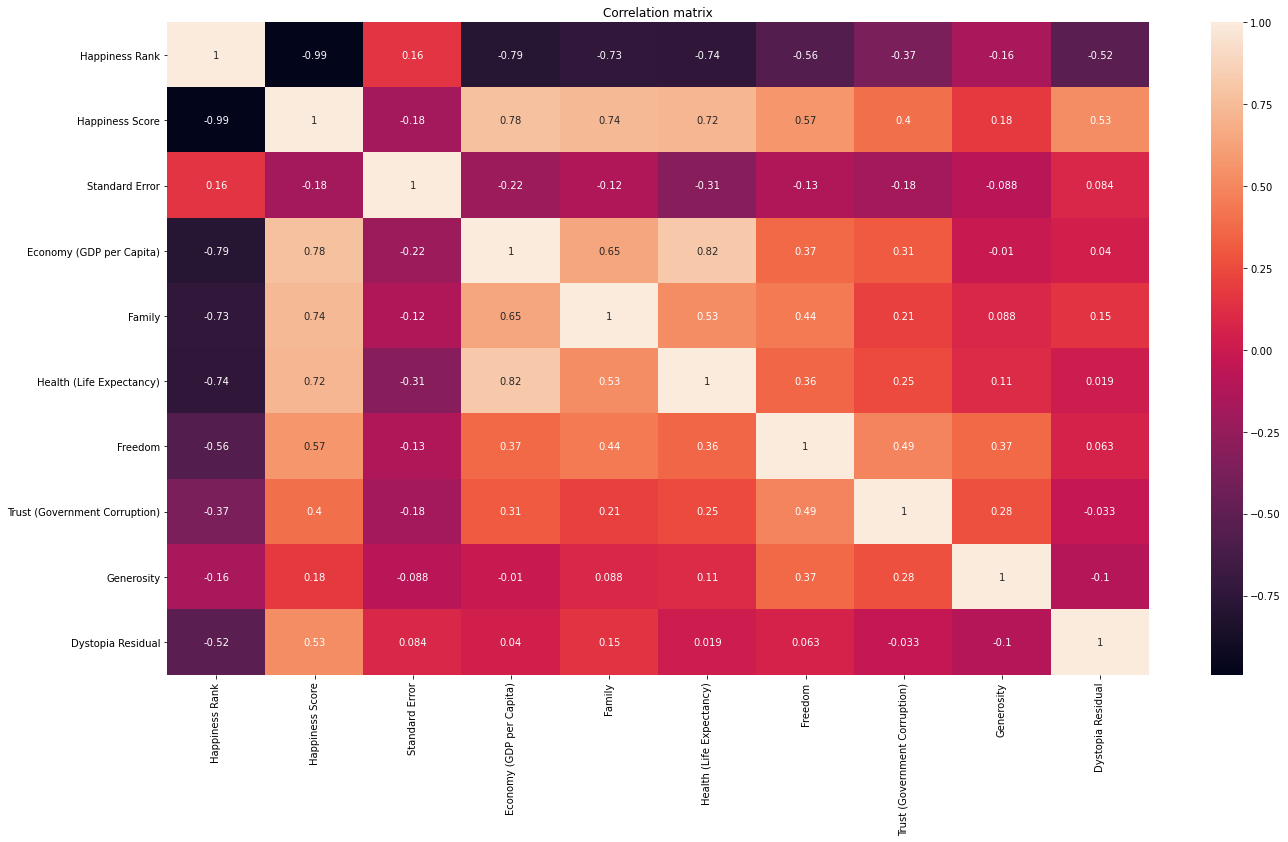

In [28]:
#Correlation using heatmap
plt.figure(figsize=[22,12])
sns.heatmap(correlation,annot=True)
plt.title("Correlation matrix")
plt.show()

In [29]:
#dividing the target and feature variables
x= data.drop(columns=['Country','Region','Happiness Rank','Happiness Score','Standard Error'],axis=5)
x


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [30]:
y=data['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

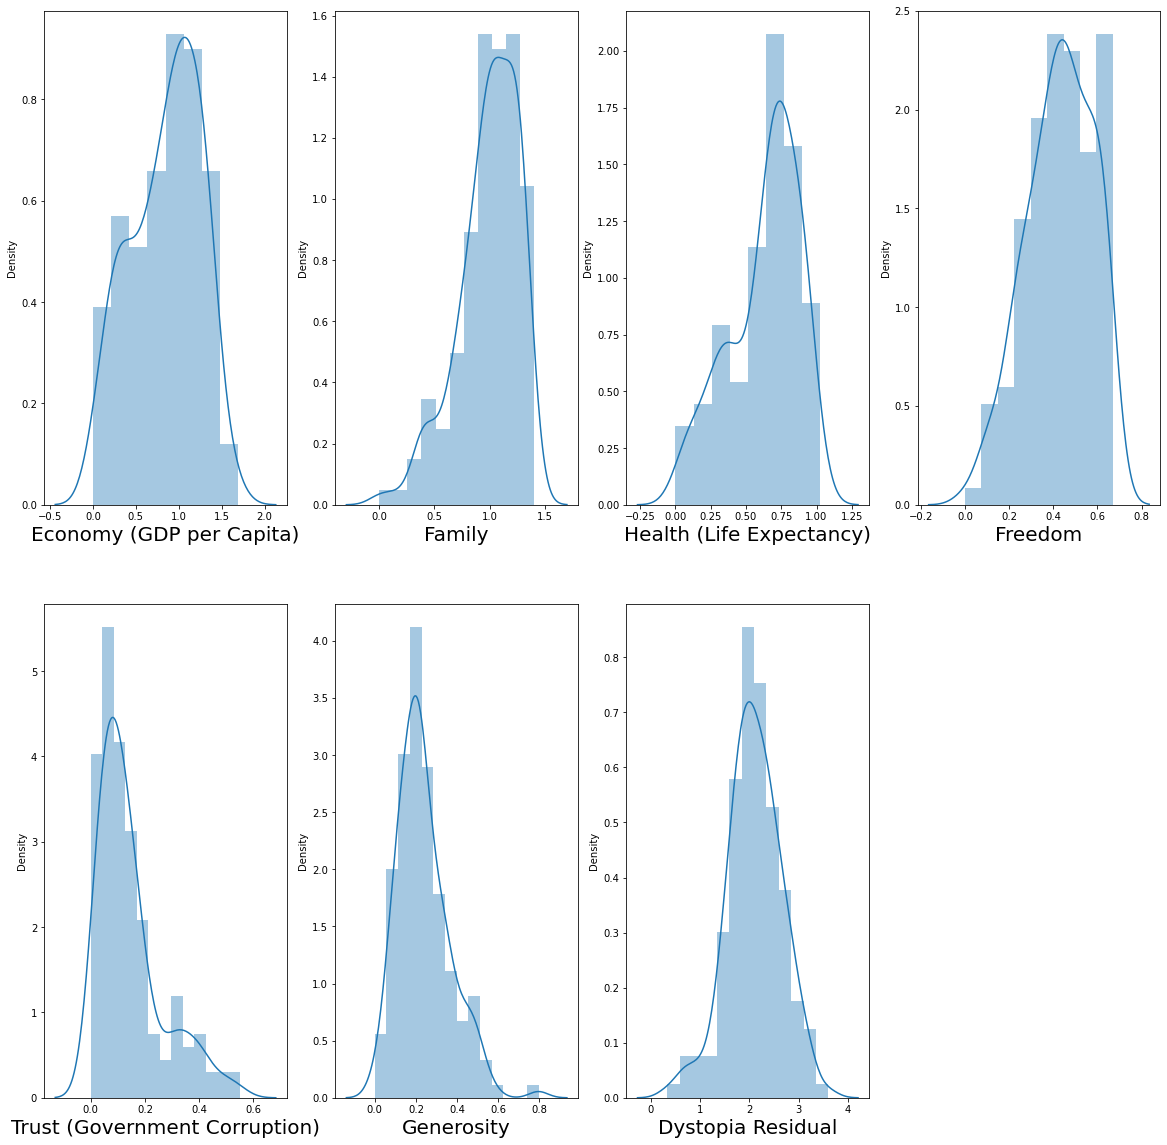

In [31]:
#visualizing the skewness of the data
plt.figure(figsize=(20,20))
plotnumber= 1

for column in x:
    if plotnumber <=7:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [32]:
x.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [33]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...
153,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [34]:
x.skew()

Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

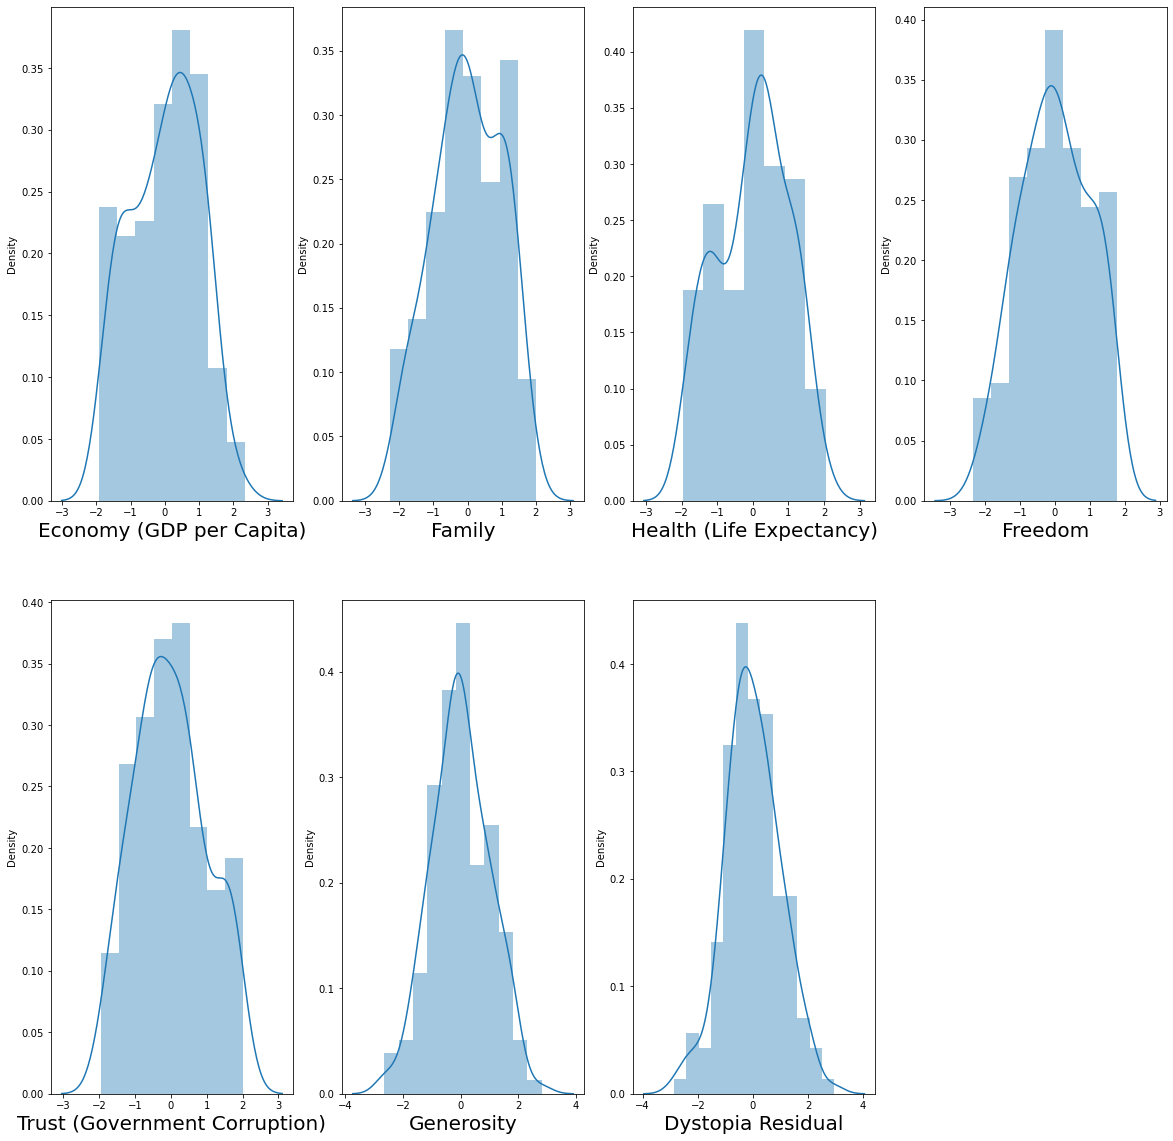

In [35]:
#visualizing the skewness of the data
plt.figure(figsize=(20,20))
plotnumber= 1

for column in x:
    if plotnumber <=7:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

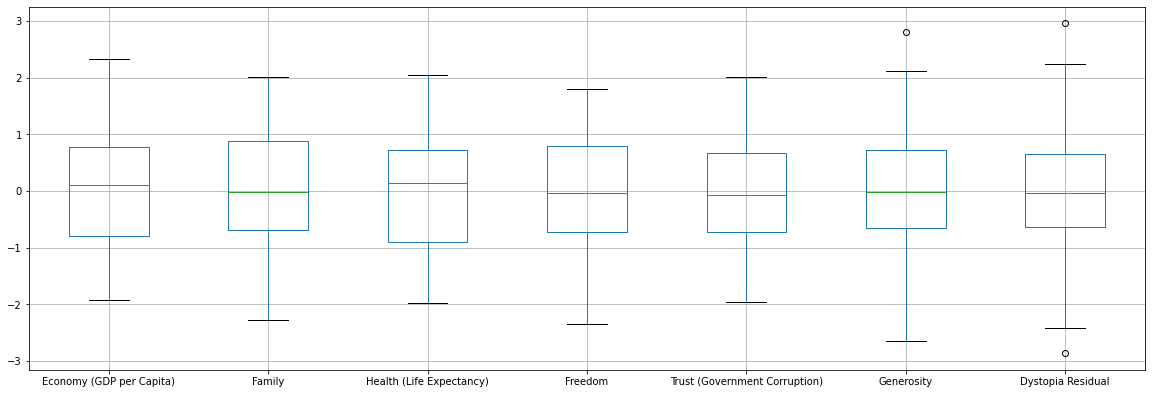

In [36]:
#checking the outliers

x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()


In [37]:
#removing outliers

from scipy.stats import zscore

z=np.abs(zscore(x))
z.shape

(158, 7)

In [38]:
#data scaling

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler 

array([[ 1.44606101,  1.66920633,  1.4917645 , ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 1.17332111,  2.01213244,  1.53234847, ...,  0.31599326,
         1.48099498,  1.11001108],
       [ 1.23983557,  1.73958573,  1.08522306, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [-0.5134688 , -1.69066357,  0.26293312, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-1.89495386, -1.79680304, -1.52569971, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [-1.52122584, -2.16039658, -1.37181091, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [39]:
#finding the variance influence factor in each column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['feature'] = x.columns

vif

,vif,feature
0,4.443693,Economy (GDP per Capita)
1,2.183167,Family
2,3.556548,Health (Life Expectancy)
3,2.005446,Freedom
4,1.377459,Trust (Government Corruption)
5,1.340049,Generosity
6,1.053250,Dystopia Residual


In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.metrics import r2_score

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_s =r2_score(y_train,pred_train)
    test_s = r2_score(y_test,pred_test)
    print(f"At random state {i},the trianing accuracy is:---{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:---{r2_score(y_test,pred_test)}")
    print("\n")


At random state 0,the trianing accuracy is:---0.9917570105181207
At random state 0,the testing accuracy is:---0.9939013998724918


At random state 1,the trianing accuracy is:---0.9921993324795164
At random state 1,the testing accuracy is:---0.991181703772061


At random state 2,the trianing accuracy is:---0.9911913967507752
At random state 2,the testing accuracy is:---0.9945962080438625


At random state 3,the trianing accuracy is:---0.9913671343215238
At random state 3,the testing accuracy is:---0.9947230097781822


At random state 4,the trianing accuracy is:---0.9909771140349999
At random state 4,the testing accuracy is:---0.9941381356771094


At random state 5,the trianing accuracy is:---0.9923890248157284
At random state 5,the testing accuracy is:---0.9899337777911588


At random state 6,the trianing accuracy is:---0.9913839130905375
At random state 6,the testing accuracy is:---0.9948899823509757


At random state 7,the trianing accuracy is:---0.9926796171840137
At random state 7,t

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=15)

In [52]:
#Linear REgression
lr.fit(x_train,y_train)


LinearRegression()

In [54]:
predict=lr.predict(x_test)


In [55]:
print(r2_score(y_test,predict))

0.9914127169347037


In [62]:
#cross_validation of the model

train_acc = r2_score(y_train,pred_train)
test_acc = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score =cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}and accuracy score for training is {train_acc} and accurancy for the test is {test_acc}")
    print('\n')

At cross fold 2 the cv score is 0.8387237957565217and accuracy score for training is -0.7458275290554903 and accurancy for the test is -0.7969939166832318


At cross fold 3 the cv score is 0.8711465094203824and accuracy score for training is -0.7458275290554903 and accurancy for the test is -0.7969939166832318


At cross fold 4 the cv score is 0.8140574719683134and accuracy score for training is -0.7458275290554903 and accurancy for the test is -0.7969939166832318


At cross fold 5 the cv score is 0.7773794322675336and accuracy score for training is -0.7458275290554903 and accurancy for the test is -0.7969939166832318


At cross fold 6 the cv score is 0.6568288649296649and accuracy score for training is -0.7458275290554903 and accurancy for the test is -0.7969939166832318


At cross fold 7 the cv score is 0.5513034822754711and accuracy score for training is -0.7458275290554903 and accurancy for the test is -0.7969939166832318


At cross fold 8 the cv score is 0.5255773812940299and accu